In [ ]:
import FunzioniBio

'''
Questo documento mostra come utilizzare la libreria FunzioniBio.
Per poter eseguire l'algorimo CEN 180 repeat annotation è necessario avere i seguenti file:
- FunzioniBio.py
- DatiFinestra.py
- Istogrammatore.py

Si comincia con l'inserimento del cromosoma che si desidera analizzare all'interno della cartella Genoma_Umano, che deve essere collocata nella stessa directory dei file elencati precedentemente.
Una volta inserito il cromosoma all'interno della cartella, è necessario inserire il suo nome e la sua estensione nelle seguenti variabili:
'''

nomeCromosoma = "cromosoma21"
estensioneCromosoma = ".fna"

'''
Una volta definito il nome del file, è necessario creare le directory nel quale verranno salvati i risultati. Si richiama la funzione gestisci_cartelle, che ritorna la directory all'interno del quale vengono salvati i risultati
'''

cartellaRisultati = FunzioniBio.gestisci_cartelle(nomeCromosoma)

'''
Una volta ottenuta la directory dei risultati si procede a caricare il cromosoma in memoria, richiamando la funzione caricaCromosoma
'''

cromosoma = FunzioniBio.caricaCromosoma(nomeCromosoma, estensioneCromosoma)

'''
La prima fase dell'algoritmo prevede la suddivisione del cromosoma in finestre da 1000 basi azotate, per poter fare ciò è necessario richiamare la funzione suddivisioneCromosomaInFinestre
'''

finestre = FunzioniBio.suddivisioneCromosomaInFinestre(cromosoma)

'''
La seconda fase dell'algoritmo prevede la suddivisione delle finestre appena ottenute in 12-mer. Per farlo si richiama la funzione suddivisioneFinestreInMers
'''

mersFinestre = FunzioniBio.suddivisioneFinestreInMers(finestre)

'''
L'algoritmo nella terza fase calcola i match dei 12-mer per ogni finestra. Per farlo si richiama la funzione calcoloMatch
'''

matchFinestra = FunzioniBio.calcoloMatch(mersFinestre)

'''
Nella quarta fase l'algoritmo raggruppa le finestre in base al numero di match.
'''

posizioniFinestre = FunzioniBio.ricalcoloFinestre(cartellaRisultati, nomeCromosoma, cromosoma, mersFinestre, matchFinestra)

FunzioniBio.creazioneNuoveFinestre(cartellaRisultati, nomeCromosoma, finestre, posizioniFinestre)

'''
Finita la quarta fase, il primo modulo è completo. Le nuove finestre vengono salvate su un file in formato .json
'''

In [ ]:
import FunzioniBio

'''
Il secondo modulo del codice può essere utilizzato subito dopo il primo o in un altro momento.
Per utilizzare il secondo modulo è sempre necessario conoscere il nome del cromosoma e la cartella dei risultati
'''

nomeCromosoma = "cromosoma21"
cartellaRisultati = FunzioniBio.gestisci_cartelle(nomeCromosoma)

'''
Il secondo modulo si occupa del calcolo delle distanze tra i 12-mer delle finestre salvate dal primo modulo (che hanno un alto tasso di ripetizione). Per calcolare le distanze si richiama la funzione calcoloDistanzeMatch.
'''

FunzioniBio.calcoloDistanzeMatch(cartellaRisultati, nomeCromosoma)

'''
Una volta completato il calcolo i risultati vengono salvati su disco. Questo conclude il secondo modulo.
'''

<IPython.core.display.Javascript object>


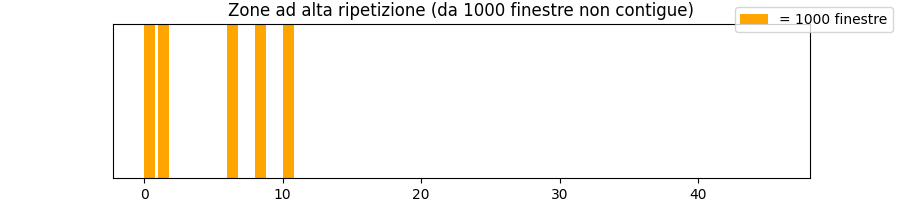

<IPython.core.display.Javascript object>


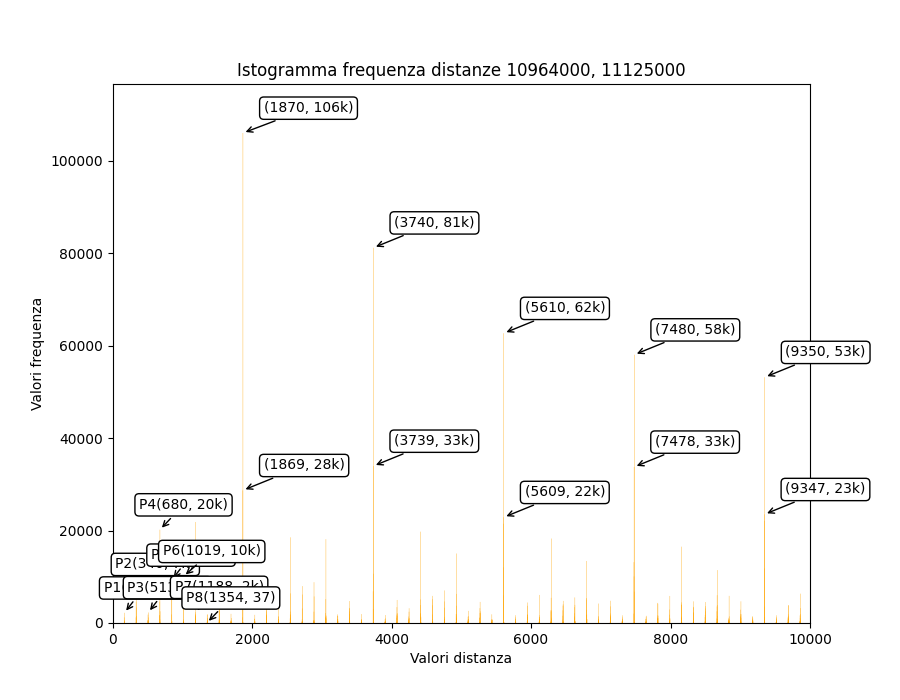

<IPython.core.display.Javascript object>


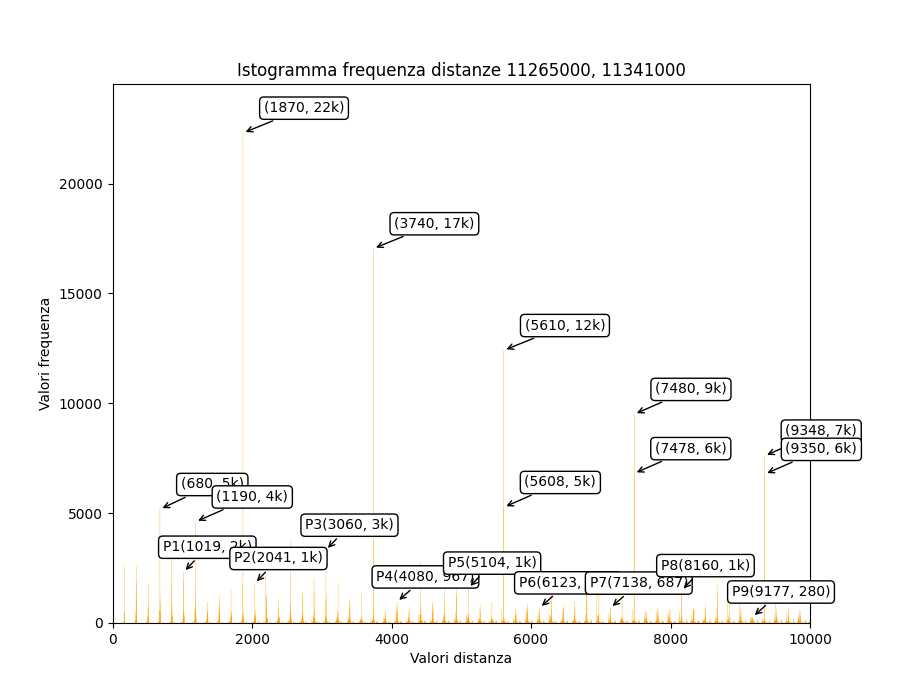

<IPython.core.display.Javascript object>


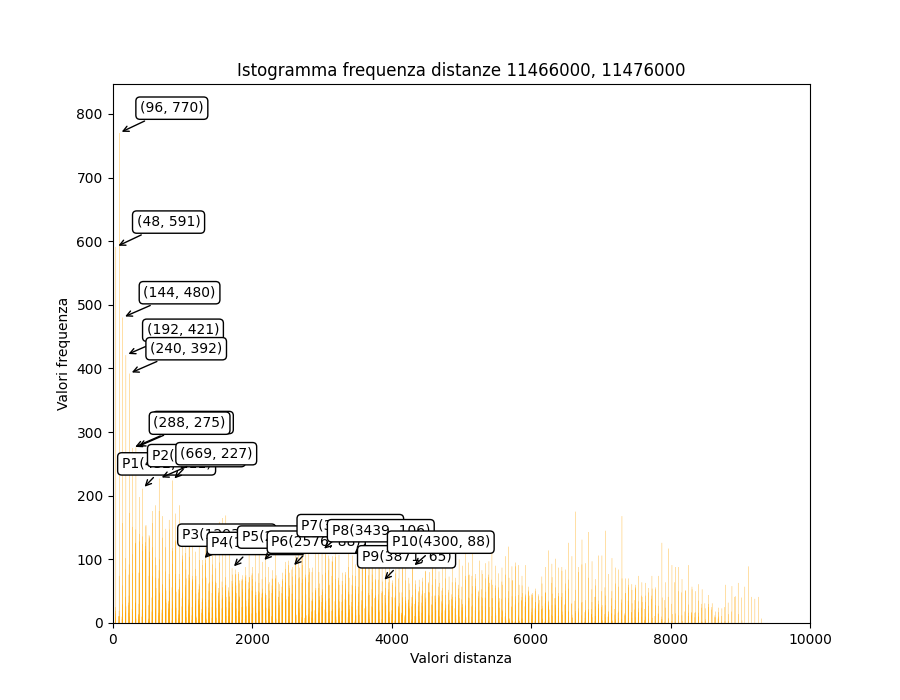

In [8]:
%matplotlib notebook
import FunzioniBio

'''
Il terzo modulo dell'algoritmo si occupa della visualizzazione dei risultati. Anch'esso, come il secondo modulo, può essere utilizzato in momenti diversi dall'esecuzione del primo modulo.
Questo modulo permette di visualizzare due tipi di grafici.
Ha bisogno di conoscere il nome del cromosoma.
'''

nomeCromosoma = "cromosoma21"

'''
Il primo grafico visualizzato rappresenta le zone ad alta ripetizione in barre da 1.000.000 di basi azotate. Per visualizzarlo basta chiamare la funzione mostra_alte_ripetizioni, fornirle il nome del cromosoma e un numero che man mano che diventa alto aumenta la tolleranza per la visualizzazione delle barre. Se il grafico risulta vuoto quindi, è necessario incrementare la tolleranza.
'''

FunzioniBio.mostra_alte_ripetizioni(nomeCromosoma, 2)

'''
Il secondo grafico è un istogramma che visualizza le distanze e le loro frequenze per ogni finestra e permette di identificare finestre che fanno parte del centromero osservando la loro distribuzione.
FunzioniBio permette di visualizzare gruppi di istogrammi per finestre selezionate attraverso l'uso dell'entropia di Shannon (poi utilizzata per ulteriori elaborazioni). Permettendo l'esclusione dalla visualizzazione di finestre che non fanno parte del centromero (e quindi non hanno una distribuzione corretta). E' possibile scegliere il numero di istogrammi che si desidera visualizzare (si consiglia un numero inferiore a 20), una soglia massima e una soglia minima per l'entropia delle finestre (si consiglia 7 per la soglia massima e 5 per la minima), e la posizione in numero di basi da cui si desidera partire per la visualizzazione (es. 10.000.000 basi azotate per visualizzare finestre che sono contenute nel cromosoma dopo la posizione 10.000.000).
Ogni grafico è interattivo e consente di visualizzare la frequenza di ogni distanza con un click sinistro del mouse su quella che si vuole visualizzare. E' inoltre possibile visualizzare i primi 9 multipli di una distanza cliccando col tasto destro del mouse su di essa.
'''

FunzioniBio.mostra_istogramma(nomeCromosoma, 5, 7, 5, 10800000)
